In [23]:
#linear regression assignment
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, RidgeClassifierCV 
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import sklearn.metrics as metrics


In [2]:
#load data
raw_df = pd.read_csv('plane_data.csv')
raw_df

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,B6,N216JB,ORH,2,57,150,1370,...,38,96,N,6,0,30.18,Cloudy,20,32,19
28816,1,31,5,AA,N104NN,BOS,2,75,187,1390,...,38,96,N,6,0,30.18,Cloudy,19,23,22
28817,1,31,5,AS,N581AS,SEA,283,392,2422,1125,...,38,96,N,6,0,30.18,Cloudy,19,23,21
28818,1,31,5,B6,N957JB,SJU,5,224,1598,1417,...,38,96,N,6,0,30.18,Cloudy,19,23,13


In [3]:
#inspect data
raw_df.isna().sum()


MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [4]:
#drop nulls
raw_df.dropna(inplace=True)
raw_df.isnull().sum()['Wind']

0

In [5]:
raw_df.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000
mean,7.893955,16.020890,4.008953,6.373239,225.294399,1267.787494,830.970470,828.898987,910.886980,41.491047,57.732806,12.368485,5.535707,30.092410,31.091956,28.431813,20.857207
std,4.991779,8.750448,1.985299,38.735195,119.483432,889.354031,299.381938,305.844666,345.370574,8.042493,23.469480,6.258667,11.886780,0.296158,9.510317,8.263242,6.850197
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1192.750000,47.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


MONTH               0.018347
DAY_OF_MONTH       -0.024065
DAY_OF_WEEK         0.028397
DEP_DELAY           0.034759
CRS_ELAPSED_TIME    0.071007
DISTANCE            0.060006
CRS_DEP_M           0.044562
DEP_TIME_M          0.057584
CRS_ARR_M           0.071524
Temperature        -0.067171
Humidity           -0.026811
Wind Speed          0.062942
Wind Gust           0.095764
Pressure           -0.059530
sch_dep             0.190374
sch_arr             0.064193
TAXI_OUT            1.000000
Name: TAXI_OUT, dtype: float64


[Text(0.5, 1.0, 'Heatmap of Variable Dependence')]

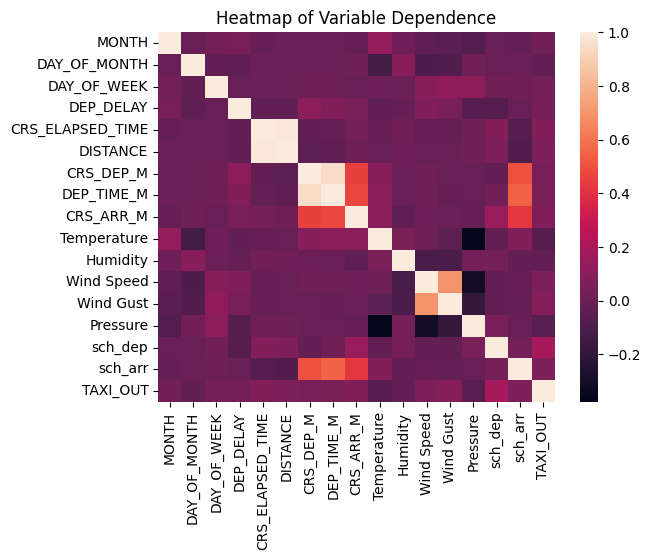

In [6]:
#find correlations for numeric
corr_map = raw_df.corr(numeric_only=True)
print(corr_map['TAXI_OUT'])
corr_map['TAXI_OUT'].to_csv('corr_map_jfk.csv', float_format= '%.3f')
sns.heatmap(corr_map).set(title = 'Heatmap of Variable Dependence')


In [7]:
#strongest correlation with taxi out is sch_dep (still is weak)
#investigate correlation for schedule dept
sch_dep = raw_df.loc[:,'sch_dep',].values.reshape(-1,1)
taxi_out = raw_df['TAXI_OUT'].values.reshape(-1,1)

In [8]:
#train_test_split model
x_train, x_test, y_train, y_test = train_test_split(sch_dep, taxi_out, random_state = 0, test_size= 0.25 )

In [9]:
#linear regression model
lin_reg = LinearRegression()

lin_reg.fit(x_train,y_train) #training model

LinearRegression()

In [10]:
#predicition
y_pred = lin_reg.predict(x_test)

comparison_df = pd.DataFrame({"predicition": y_pred.flatten(), "actual": np.array(y_test).flatten()})
comparison_df

,predicition,actual
0,20.577437,17
1,19.742643,16
2,18.490451,12
3,20.716569,18
4,23.638350,18
...,...,...
7200,22.664423,27
7201,20.577437,14
7202,21.968761,13
7203,19.603510,15


In [11]:
#performance
print("Linear Regression Model")
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2:", metrics.r2_score(y_test, y_pred))

Linear Regression Model
MAE: 5.305601229274477
MSE: 44.485272435037054
RMSE: 6.669728063050026
R2: 0.033842667051938724


In [12]:
#does multi variable regression improve
independent_variables = raw_df.select_dtypes(include=np.number)
independent_variables = independent_variables.drop('TAXI_OUT', axis=1).values

In [13]:
#test_train data
x_train2, x_test2, y_train2, y_test2 = train_test_split(independent_variables, taxi_out, random_state = 0, test_size = 0.25 )

In [14]:
#scaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train2)
x_test = scaler.transform(x_test2)


In [15]:
#building new linear regression model
lin_reg2 = LinearRegression()
lin_reg2.fit(x_train2, y_train2)

LinearRegression()

In [16]:
#predicting
y_pred2 = lin_reg2.predict(x_test2)

comparison_df2 = pd.DataFrame({"predicition": y_pred2.flatten(), "actual": np.array(y_test2).flatten()})
comparison_df2

,predicition,actual
0,20.121665,17
1,19.348186,16
2,17.379952,12
3,19.289996,18
4,23.074071,18
...,...,...
7200,22.519983,27
7201,21.191324,14
7202,19.424204,13
7203,18.507258,15


In [17]:
#multi-variable linear regression model evaluation
print("Multi-variable linear regression")
print("MAE:", metrics.mean_absolute_error(y_test2, y_pred2))
print("MSE:", metrics.mean_squared_error(y_test2, y_pred2))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))
print("R2:", metrics.r2_score(y_test2, y_pred2))

Multi-variable linear regression
MAE: 5.235768395602337
MSE: 43.22075855762939
RMSE: 6.574249657385198
R2: 0.061306123796102896


In [18]:
#ridge model
cross_validation = RepeatedKFold(n_splits = 10, n_repeats= 3, random_state = 0) # K-fold 
ridge_classifier = RidgeClassifierCV(alphas=(0.1,1,10), cv = cross_validation, scoring = 'neg_mean_absolute_error')

ridge_classifier.fit(x_train2, y_train2)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:1179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RidgeClassifierCV(alphas=(0.1, 1, 10),
                  cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=0),
                  scoring='neg_mean_absolute_error')

In [19]:
#ridge predicition
y_pred_ridge = ridge_classifier.predict(x_test2)

ridge_df = pd.DataFrame({"predict": y_pred_ridge  ,"actual":np.array(y_test).flatten()})
ridge_df

,predict,actual
0,16,17
1,16,16
2,17,12
3,15,18
4,18,18
...,...,...
7200,18,27
7201,16,14
7202,16,13
7203,16,15


In [20]:
#evaluation
print("Ridge classifier metrics")
print("MAE:", metrics.mean_absolute_error(y_test, y_pred_ridge))
print("MSE:", metrics.mean_squared_error(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))
print("R2:", metrics.r2_score(y_test, y_pred_ridge))

Ridge classifier metrics
MAE: 5.711866759195003
MSE: 59.38848022206801
RMSE: 7.706392166381621
R2: -0.28983397242274567


9

In [48]:
#investigating aircraft carrier unique number on 
print(raw_df["OP_UNIQUE_CARRIER"].nunique())
airline = raw_df['OP_UNIQUE_CARRIER'].values.reshape(-1,1)

9


In [46]:
#one hot encoder
encoder = OneHotEncoder(sparse_output=False)
onehot_airline = encoder.fit_transform(airline)
onehot_airline

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
#splitting data
x_train3, x_test3, y_train3, y_test3 = train_test_split(onehot_airline, taxi_out, random_state = 0, test_size = 0.25)

In [33]:
#training linear model
lin_reg3 = LinearRegression()
lin_reg3.fit(x_train3, y_train3)

LinearRegression()

In [45]:
#prediction
y_pred_1hot = lin_reg3.predict(x_test3)
df_onehot = pd.DataFrame({'prediction': y_pred_1hot.flatten(), 'actual': np.array(y_test3).flatten()})
df_onehot

,prediction,actual
0,21.568359,17
1,19.576172,16
2,19.576172,12
3,19.576172,18
4,21.181641,18
...,...,...
7200,21.181641,27
7201,19.576172,14
7202,19.576172,13
7203,20.412109,15


In [49]:
print("One hot")
print("MAE:", metrics.mean_absolute_error(y_test3, y_pred_1hot))
print("MSE:", metrics.mean_squared_error(y_test3, y_pred_1hot))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test3, y_pred_1hot)))
print("R2:", metrics.r2_score(y_test3, y_pred_1hot))

One hot
MAE: 5.330218543979875
MSE: 44.46250029808113
RMSE: 6.668020718180256
R2: 0.034337245727139365
